This tutorial shows how the STiMetaD class can be used for kinetics inference through the Short-Time Infrequent Metadynamics method. When initiating the class, one can set the minimal number of samples used for the inference. the default value is 5.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from STiMetaD import STiMetaD

estimator = STiMetaD(minSampleSize = 5)

We use data of Metadynamics simulations of alanine dipeptide, biasing the suboptimal $\psi$ angle as collective variable at different deposition rates.
Each data csv file contains three columns: the simulation time, the acceleration factor and the rescaled time.

All functions of the STiMetaD class require a numpy array of rescaled first-passage times. Here, we provide it with the appropriate column of the data csv file ("predicted"). The STiMetaD class provides estimations for the mean first-passage time (MFPT), the kinetic rate and $t^*$. Below, we obtain estimations for simulations with a bias pace of 20 ps, in units of $\mu s$ or $\mu s ^ {-1}$.

In [2]:
data = pd.read_csv("exampleData/alanine20.csv")
samples = np.array(data.predicted)
print(f"MFPT: {estimator.estimateMFPT(samples = samples) / 1e6}, "\
      f"k: {estimator.estimateRate(samples = samples) * 1e6}, "\
      f"t*: {estimator.estimateTstar(samples = samples) / 1e6}")

MFPT: 5.0546241896400215, k: 0.19783864486891112, t*: 0.184311499096


We can use values for the minimal numbers of samples which are different from the one set when initializing the class,
by setting the minSampleSize parameter.

In [3]:
print(f"MFPT (minimum 5 samples): {estimator.estimateMFPT(samples = samples) / 1e6}, "\
      f"MFPT (minimum 50 samples): {estimator.estimateMFPT(samples = samples, minSampleSize = 50) / 1e6}")

MFPT (minimum 5 samples): 5.0546241896400215, MFPT (minimum 50 samples): 8.398149074709304


We can also obtain a pandas dataframe with estimations of the kinetic rates for different choices of $t^*$. It also gives $R^2$ for each estimation.

In [4]:
print(estimator.obtainEstimationsDataFrame(samples = samples, minSampleSize = 5)[:10])

           time    prediction        R2
0  33849.311881  1.391923e-07  0.805184
1  34869.917104  1.431131e-07  0.885909
2  41944.413164  1.525084e-07  0.903221
3  45725.439924  1.572324e-07  0.929170
4  49134.368885  1.622596e-07  0.941932
5  54918.959304  1.674673e-07  0.947387
6  62037.590678  1.710456e-07  0.955537
7  62251.465158  1.726921e-07  0.964751
8  68237.711000  1.766459e-07  0.964608
9  80602.464350  1.794084e-07  0.967944


Lastly, the class can also give the standard iMetaD estimation, and its p-value. The number of samples from the fitted exponential distribution is adjustable.

In [5]:
print(f"MFPT (iMetaD): {estimator.iMetaDMFPT(samples = samples) }, "\
      f"k (iMetaD): {estimator.iMetaDrate(samples = samples) }, "\
      f"MFPT, p-value: {estimator.iMetaDMFPT(samples = samples, KStest = True, fitSamples = 1000000) }, "\
      f"k, p-value: {estimator.iMetaDrate(samples = samples, KStest = True, fitSamples = 1000000) }")

MFPT (iMetaD): 33191796.97649364, k (iMetaD): 3.012792590615681e-08, MFPT, p-value: (33191796.97649364, 2.2274556605378927e-26), k, p-value: (3.012792590615681e-08, 1.965701811113969e-26)


Below, we regenerate Figure 3(b), to demontrate the use of the class.

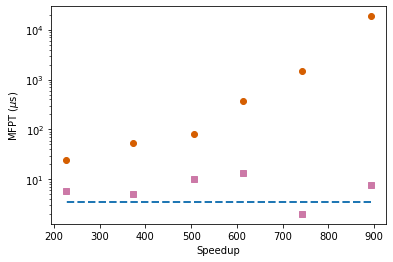

In [6]:
unbiased = 3494120 # Unbiased MFPT in ps
paces = [1,2,5,10,20,50]
speedups = []
iMetaDpredictions = []
STiMetaDpredictions = []

for pace in paces:
    data = pd.read_csv(f"exampleData/alanine{pace}.csv")
    samples = np.array(data.predicted)

    iMetaDpredictions.append(estimator.iMetaDMFPT(samples = samples)/1e6)
    STiMetaDpredictions.append(estimator.estimateMFPT(samples = samples)/1e6)
    speedups.append(unbiased/data.time.mean())

plt.plot(speedups,[unbiased/1e6 for speedup in speedups],linestyle="dashed",linewidth=2)
plt.plot(speedups,iMetaDpredictions,"o",c='#D55E00')
plt.plot(speedups,STiMetaDpredictions,"s",c='#CC79A7') 
plt.xlabel("Speedup")
plt.ylabel(r"MFPT ($\mu$s)")
plt.yscale("log")